<a href="https://colab.research.google.com/github/UmerButt015/codealpha/blob/main/Iris_Flower_Classification_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
iris_df = pd.read_csv('iris.csv')
iris_df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Remove irrelevant features
iris_df = iris_df.drop(columns=['Id'])


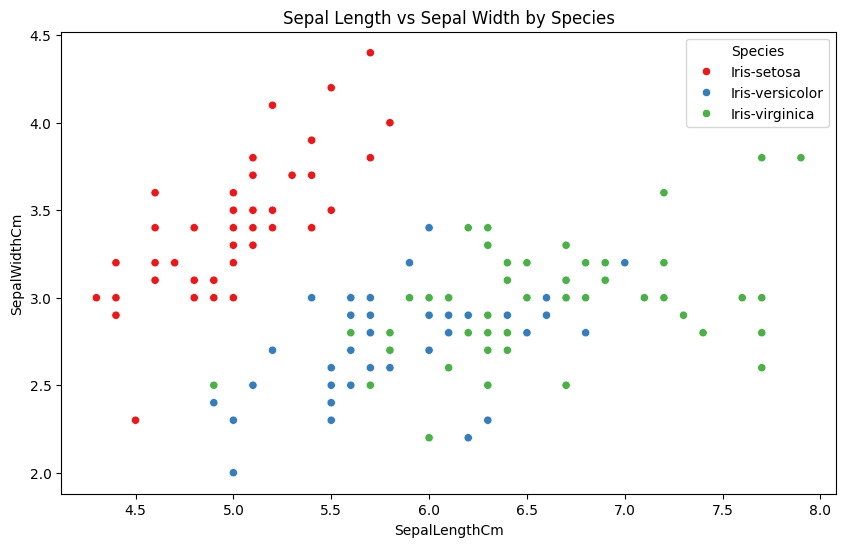

In [5]:
# Data Visualization

# Scatter plot: Sepal Length vs Sepal Width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='Set1')
plt.title('Sepal Length vs Sepal Width by Species')
plt.show()


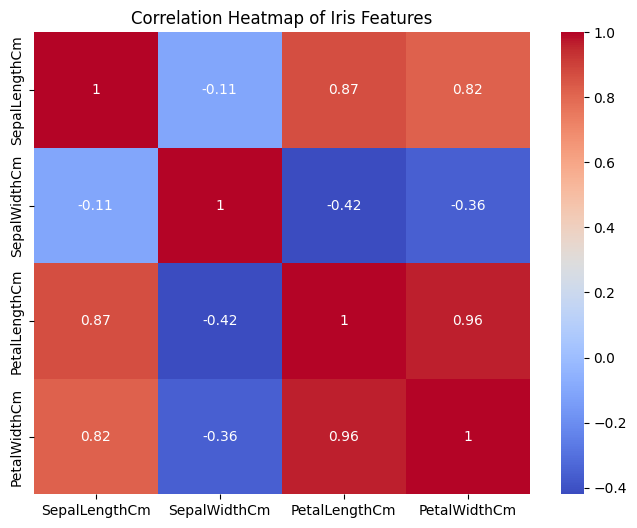

In [6]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = iris_df.drop(columns=['Species']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Iris Features')
plt.show()

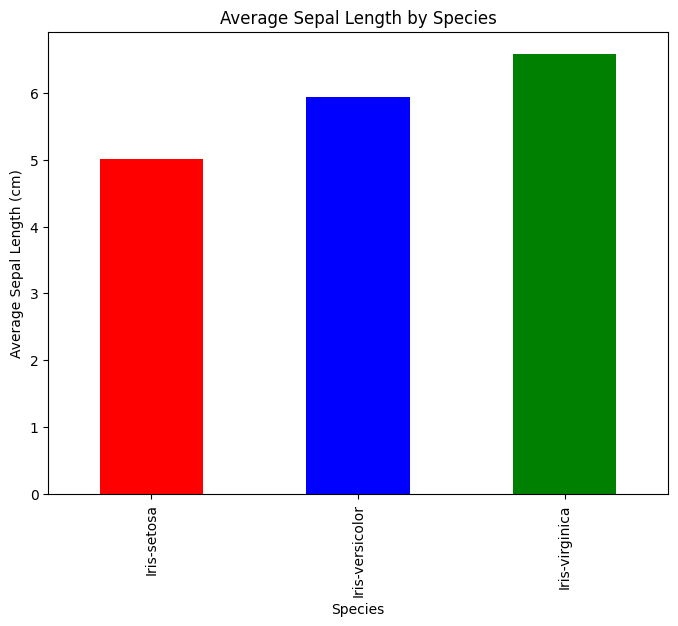

In [7]:
# Bar chart: Average Sepal Length by Species
plt.figure(figsize=(8, 6))
avg_sepal_length = iris_df.groupby('Species')['SepalLengthCm'].mean().sort_values()
avg_sepal_length.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Average Sepal Length by Species')
plt.ylabel('Average Sepal Length (cm)')
plt.xlabel('Species')
plt.show()

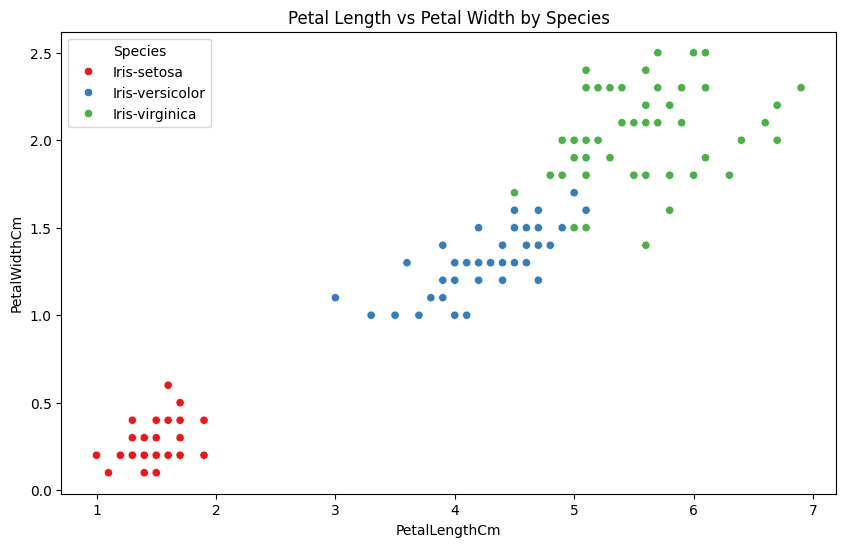

In [8]:
# Scatter plot: Petal Length vs Petal Width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette='Set1')
plt.title('Petal Length vs Petal Width by Species')
plt.show()

In [9]:
# Prepare data for modeling
le = LabelEncoder()
iris_df['Species'] = le.fit_transform(iris_df['Species'])
X = iris_df.drop(columns=['Species'])
y = iris_df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train two classification models
model1 = LogisticRegression(max_iter=200)
model2 = RandomForestClassifier(random_state=42)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

acc1 = accuracy_score(y_test, pred1)
acc2 = accuracy_score(y_test, pred2)

print(f"Logistic Regression Accuracy: {acc1:.2f}")
print(f"Random Forest Accuracy: {acc2:.2f}")


Logistic Regression Accuracy: 1.00
Random Forest Accuracy: 1.00


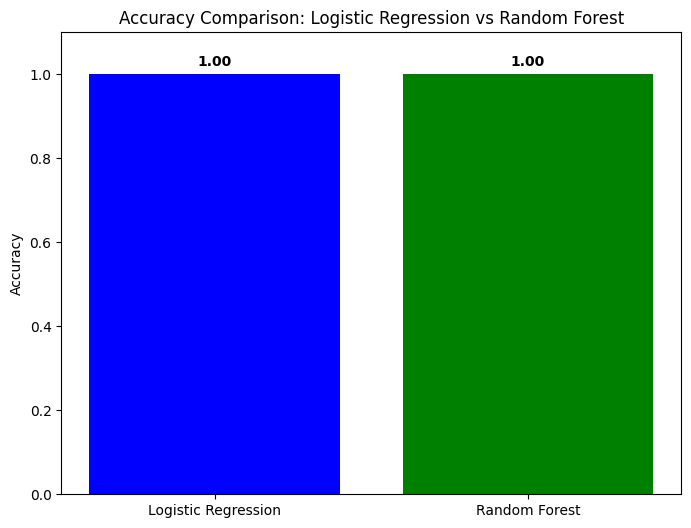

In [11]:
models = ['Logistic Regression', 'Random Forest']
accuracies = [acc1, acc2]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1.1)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Logistic Regression vs Random Forest')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

In [12]:
# Choose the best model
if acc2 >= acc1:
    best_model = model2
    print("Random Forest selected as the best model.")
else:
    best_model = model1
    print("Logistic Regression selected as the best model.")


Random Forest selected as the best model.


<Figure size 800x600 with 0 Axes>

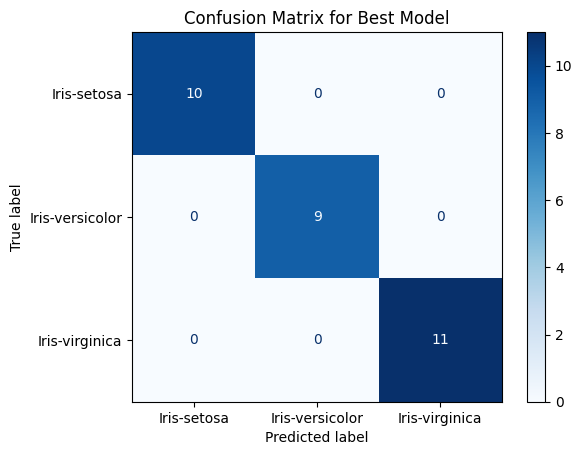

In [13]:
# Confusion Matrix
best_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(8, 6))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix for Best Model')
plt.show()


In [14]:
# User input prediction (simulated for non-interactive environments)
def predict_iris_from_input(sepal_length, sepal_width, petal_length, petal_width):
    input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
    prediction = best_model.predict(input_data)
    species = le.inverse_transform(prediction)
    print(f"Predicted Iris Species: {species[0]}")

# Example usage (simulate user input)
predict_iris_from_input(5.1, 3.5, 1.4, 0.2)  # Should predict Iris-setosa

Predicted Iris Species: Iris-setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
